# LAB 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
class Image_analyzer():
    def __init__(self , image_path = None):
        self.image_path = image_path
        self.image_array = None
        self.width = None
        self.height = None
        self.max_pixel_value = None
        
    def mypgmread(self, image_path = None):
        if image_path == None and self.image_path == None:
            raise ValueError('Please provide an image path')
        if image_path == None:
            image_path = self.image_path
        print('Reading image from:', image_path)
        # Read pgm image from file
        with open(image_path, 'rb') as f:
            # Read the header of the image
            first_line = f.readline()
            # Check if the image is in P5 format
            if first_line != b'P5\n':
                raise ValueError('Image format not supported' + str(first_line))
            # Read the next lines and check for comments and ignore them
            second_line = f.readline()
            while second_line[0] == 35: # 35 is the ascii code for #
                second_line = f.readline()
            # Read the image width and height values
            width_and_height_line = second_line
            width_and_height = width_and_height_line.split()
            width, height = int(width_and_height[0]), int(width_and_height[1])
            # Read the max pixel value
            max_pixel_value_line = f.readline()
            max_pixel_value = int(max_pixel_value_line)
            # Read the image data
            image_data = f.read()
            # Create a numpy array from the image data
            image_array = np.frombuffer(image_data, dtype=np.uint8)
            # Reshape the image to matrix
            image_array = image_array.reshape((height, width))
            self.image_array = image_array.copy()
            self.width = width
            self.height = height
            self.max_pixel_value = max_pixel_value
            return image_array, width, height, max_pixel_value
    def mypgmwrite(self, width = None, height = None, max_pixel_value = None, image_array = None ,image_path = None):
        if width == None and self.width == None:
            raise ValueError('Please provide a width value or read an image first')
        elif width == None:
            width = self.width
        if height == None and self.height == None:
            raise ValueError('Please provide a height value or read an image first')
        elif height == None:
            height = self.height
        if max_pixel_value == None and self.max_pixel_value == None:
            raise ValueError('Please provide a max pixel value or read an image first')
        elif max_pixel_value == None:
            max_pixel_value = self.max_pixel_value
        image_array = np.array(image_array)
        if image_array.all() is None and self.image_array.all() is None:
            raise ValueError('Please provide an image array or read an image first')
        elif image_array.all() is None:
            image_array = self.image_array
        try :
            if image_array == None and self.image_array == None:
                raise ValueError('Please provide an image array')
        except:
            pass
        try :
            if image_array == None:
                image_array = self.image_array
        except:
            pass
        
        
        
        
        if image_path == None and self.image_path == None:
            raise ValueError('Please provide an image path')
        if image_path == None:
            image_path = self.image_path
        self.width = width
        self.height = height
        self.max_pixel_value = max_pixel_value
        # Write pgm image to file
        with open(image_path, 'wb') as f:
            # Write the header of the image
            f.write(b'P5\n')
            # Write the width and height of the image
            f.write(b'%d %d\n' % (width, height))
            # Write the max pixel value
            f.write(b'%d\n' % max_pixel_value)
            # Write the image data
            f.write(image_array.tobytes())
        print('Image written to:', image_path)
    def draw_straight_line(self, x1, x2, y1, y2,):
        if  self.image_array.all() is None:
            raise ValueError('Please read an image first')
        #check out bounds of the image array
        if  x1 < 0 or x1 > self.height      \
            or x2 < 0 or x2 > self.height   \
            or y1 < 0 or y1 > self.width  \
            or y2 < 0 or y2 > self.width:
            raise ValueError('Coordinates out of bounds')
        for i in range(x1, x2):
            for j in range(y1, y2):
                self.image_array[i][j] = 0 
    def draw_vertical_line(self, y1, y2):
        self.draw_straight_line(0, self.height, y1, y2)
    def draw_horizontal_line(self, x1, x2):
        self.draw_straight_line(x1, x2, 0 , self.width)
        
    #Illustration functions
    def show_image(self):
        if  self.image_array.all() is None:
            raise ValueError('Please read an image first or use show_image_from_array')
        plt.imshow(self.image_array, cmap='gray', vmin=0, vmax=255)
    def show_image_from_array(self, image_array):
        plt.imshow(image_array, cmap='gray', vmin=0, vmax=255)
    
    
    def myImageCorrelation(self, kernel : np.ndarray):
        g = np.zeros((self.height, self.width))    
        kernel_height, kernel_width = kernel.shape
        for x in range(self.height):
            for y in range(self.width):
                for s in range(-kernel_height//2 + 1, kernel_height//2 + 1):
                    for t in range(-kernel_width//2 + 1, kernel_width//2 + 1):
                        if 0 <= x + s < self.height and 0 <= y + t < self.width \
                            and 0 <= s + kernel_height//2 < kernel_height and 0 <= t + kernel_width//2 < kernel_width:
                            g[x][y] += kernel[s + kernel_height // 2][t + kernel_width // 2] * self.image_array[x + s][y + t]        
        return g
    
    
    
    # Image scaling between 0 and 255
    def image_array_scale(self, image_array: np.ndarray):
        if np.min(image_array) < 0:
            image_array = image_array + abs( np.min(image_array))
        if np.min(image_array) > 0:
            image_array = image_array - np.min(image_array)
        
        #linear scale according to the max pixel value
        image_array = image_array * 255 / np.max(image_array)
        #convert to integer
        image_array = np.array(image_array, dtype=np.uint8)
        return image_array
    
    def myImageNegative(self):
        return self.max_pixel_value - self.image_array

    def myImageLogTransform(self, c = 1):
        return (c * np.log(np.ones(self.image_array.shape) + self.image_array))
    
    def myImageGammaTransform(self, gamma = 1, c = 1):
        return (c * np.power(self.image_array, gamma))
    
    def myImageMedianFilter(self, kernel_size = 3):
        g = np.zeros((self.height, self.width))
        for x in range (self.height):
            for y in range(self.width):
                values = []
                for s in range(-kernel_size//2,kernel_size//2):
                    for t in range(-kernel_size//2,kernel_size//2):
                        if x+s >= 0 and x+s < self.height and y+t >= 0 and y+t < self.width:
                            values.append(self.image_array[x+s][y+t])
                g[x][y] = np.median(values)
        return g
    
    def myImageHistogramEqualization(self):
        g = np.zeros((self.height, self.width))
        hist, bins = np.histogram(self.image_array.flatten(),256,[0,256])
        cdf = hist.cumsum()
        cdf_normalized = cdf / cdf.max()
        for x in range (self.height):
            for y in range(self.width):
                g[x][y] = cdf_normalized[self.image_array[x][y]]
        return g
    
    def myImageNormalizedCdf(self , image_array : np.ndarray):
        hist, bins = np.histogram(image_array.flatten(),256,[0,256])
        cdf = hist.cumsum()
        cdf_normalized = cdf / cdf.max()
        return cdf_normalized
    
    def get_gaussian_filter(self, size, sigma):
        filter = np.zeros((size, size))
        for x in range(size):
            for y in range(size):
                filter[x][y] = np.exp(-((x - size//2)**2 + (y - size//2)**2) / (2 * sigma**2))
        return filter/np.sum(filter)
    
    def my2Dfft(self, image_array = None, m_point = None, n_point = None):
        try :
            if image_array == None :
                image_array = self.image_array
        except:
            pass
        height, width = image_array.shape
        if m_point == None:
            m_point = height
        if n_point == None:
            n_point = width
        
        #first take the fft for the rows in one dimention then for coulumns 
        fourier_image = np.zeros( shape=(m_point, n_point), dtype=complex)
        for x in range(height):
            fourier_image[x] = np.fft.fft(image_array[x], n = n_point)
        for y in range(n_point):
            fourier_image[:,y] = np.fft.fft(fourier_image[:,y], n = m_point)
        
        return fourier_image
    def my2Dfftshifted(self, image_array = None):
        try :
            if image_array == None :
                image_array = self.image_array
        except:
            pass
        mask = np.zeros(image_array.shape)
        for  x in range(image_array.shape[0]):
            for y in range(image_array.shape[1]):
                mask[x][y] = (-1)**(x+y)
        image_array = image_array * mask
        return self.my2Dfft(image_array)
    def my2Difft(self, fourier_image, m_point = None, n_point = None):
        try :
            if fourier_image == None :
                fourier_image = self.image_array
        except:
            pass
        f_conj_MN = self.my2Dfft(np.conj(fourier_image) , m_point, n_point)
        height, width = fourier_image.shape
        f_MN = np.conj(f_conj_MN)
        f = f_MN / (height * width)
        return f
        
        
    
    
    def my1Dft(self, array_1d : np.ndarray):
        #take the fourier transform using the classic formula
        #check if the array is 1D
        if len(array_1d.shape) != 1:
            raise ValueError('Please provide a 1D array')
        fourier_array = np.zeros(array_1d.shape, dtype=complex)
        N = len(array_1d)
        for k in range(N):
            for n in range(N):
                fourier_array[k] += array_1d[n] * np.exp( -1j*(2 * np.pi/N)* k * n)
        return fourier_array
    
    def my2Dft(self):
        if len(self.image_array.shape) != 2:
            raise ValueError('Please provide a 2D array')
        #first take the fft for the rows in one dimention then for coulumns 
        fourier_array = np.zeros(self.image_array.shape, dtype=complex)
        for x in range(self.image_array.shape[0]):
            fourier_array[x] = self.my1Dft(self.image_array[x])
        for y in range(self.image_array.shape[1]):
            fourier_array[:,y] = self.my1Dft(fourier_array[:,y])
        
        return fourier_array
    
        
    
    # Getters and setters
    def get_image_path(self):
        return self.image_path
    def set_image_path(self, image_path):
        self.image_path = image_path
    def get_image_array(self):
        return self.image_array
    def get_image_width(self):
        return self.width
    def set_image_width(self, width):
        self.width = width
    def get_image_height(self):
        return self.height
    def set_image_height(self, height):
        self.height = height
    
    
        

In [4]:
file_dir = os.getcwd()
images_dir = file_dir + "/images/"

fig_03_43_a_path = images_dir+"Fig0343(a)(skeleton_orig).pgm"
print(fig_03_43_a_path)

fig_03_43_a_analyzer = Image_analyzer(fig_03_43_a_path)

fig_03_43_a_analyzer.mypgmread()

c:\Users\yagmu\OneDrive\Desktop\dersler beyzanur\4.sınıf\güz\Image_Processing\Yeni klasör/images/Fig0343(a)(skeleton_orig).pgm
Reading image from: c:\Users\yagmu\OneDrive\Desktop\dersler beyzanur\4.sınıf\güz\Image_Processing\Yeni klasör/images/Fig0343(a)(skeleton_orig).pgm


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 500,
 800,
 255)

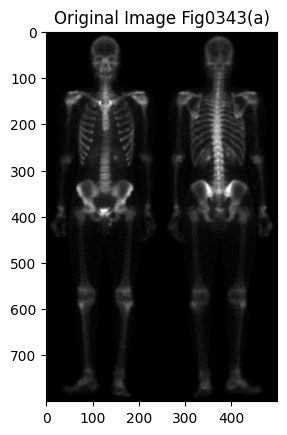

In [5]:
plt.figure()
plt.title("Original Image Fig0343(a)")
plt.imshow(fig_03_43_a_analyzer.image_array, cmap='gray')

In [6]:
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

fig_03_43_b_time_domain = fig_03_43_a_analyzer.myImageCorrelation(laplacian_kernel)



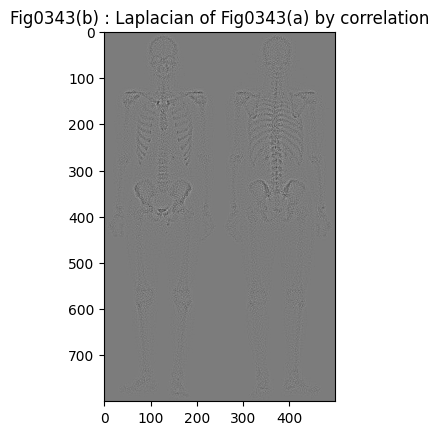

In [7]:
plt.figure()
plt.title("Fig0343(b) : Laplacian of Fig0343(a) by correlation")
plt.imshow(fig_03_43_b_time_domain, cmap='gray')

Fig0343(b) laplacian filtresinin zaman domaininde korelasyon işlemi ile uygulanması sonucunda oluşmuştur. Görüntüde iskeletin kenarları grülebilmektedir.

In [8]:
laplacian_kernel_size = laplacian_kernel.shape
print(laplacian_kernel_size)
fig_03_43_a_size = fig_03_43_a_analyzer.image_array.shape
print(fig_03_43_a_size)



(3, 3)
(800, 500)


In [9]:
print(laplacian_kernel)

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


In [10]:
print(laplacian_kernel[0])

[0 1 0]


In [11]:
fig_03_43_a_fourier = fig_03_43_a_analyzer.my2Dfft(m_point=laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                   n_point=laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1)

In [12]:
laplacian_kernel_fourier = Image_analyzer().my2Dfft(    image_array= laplacian_kernel,
                                                            m_point=laplacian_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                            n_point=laplacian_kernel_size[1] + fig_03_43_a_size[1] - 1)


In [13]:
fig_03_43_b_fourier_domain = fig_03_43_a_fourier * laplacian_kernel_fourier

fig_03_43_b_inverse_fourier = Image_analyzer().my2Difft(fig_03_43_b_fourier_domain)

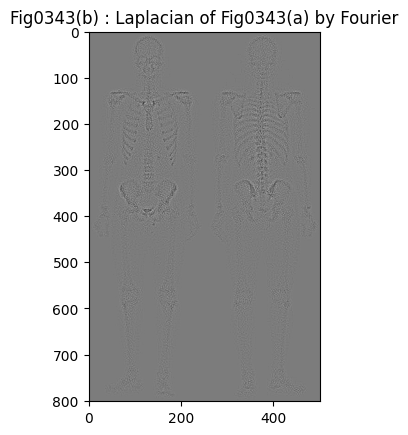

In [14]:
plt.figure()
plt.title("Fig0343(b) : Laplacian of Fig0343(a) by Fourier")
plt.imshow(np.real(fig_03_43_b_inverse_fourier), cmap='gray')


laplacian filtresinin fourier transformu alınmıştır, sonra filte frekans uzayında , frekans uzayındaki görüntü ile çarpılarak, sonra çıkan sonucun tekrar ters fourier transformu alınarak uygulanmıştır. Bunun sonucunda Fig0343(b) oluşmuştur.

In [15]:
fig_03_43_c_time_domain = fig_03_43_a_analyzer.image_array + fig_03_43_b_time_domain


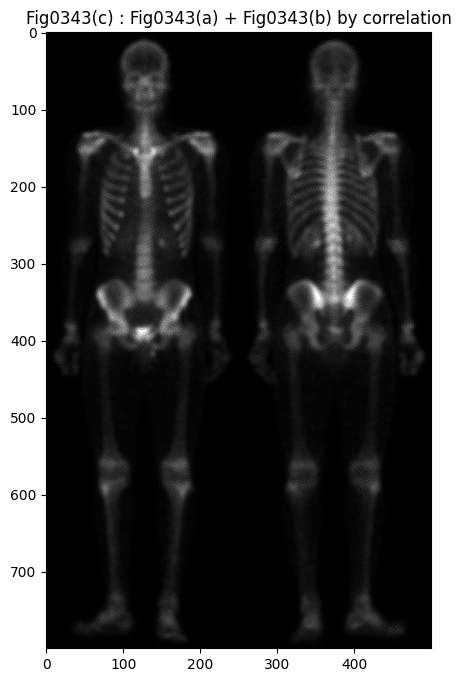

In [16]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(c) : Fig0343(a) + Fig0343(b) by correlation")
plt.imshow(fig_03_43_c_time_domain, cmap='gray', vmin=0, vmax=255)
plt.show()

zaman domaininde a ile b görüntüsü toplanarak Fig0343(c) görüntüsü elde edilmiştir. Ve bun keskinleştirilmiş görüntüdür.

In [17]:
fig_03_43_c_fourier_domain = fig_03_43_a_fourier + fig_03_43_b_fourier_domain
fig_03_43_c_inverse_fourier = Image_analyzer().my2Difft(fig_03_43_c_fourier_domain)

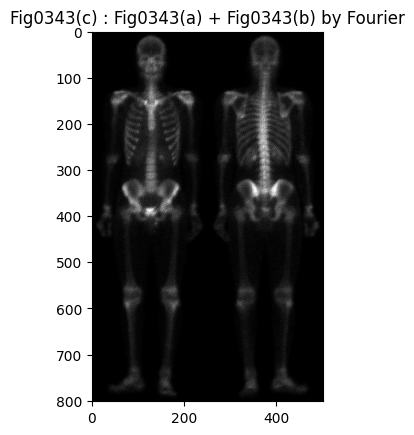

In [18]:
plt.figure()
plt.title("Fig0343(c) : Fig0343(a) + Fig0343(b) by Fourier")
plt.imshow(np.real(fig_03_43_c_inverse_fourier), cmap='gray', vmin=0, vmax=255)
plt.show()

a ve b görüntüsün fourier dönüşümlerini toplayıp sonra ters fourier dönüşümlerini tekrar alındığında de Fig0343(c) görüntüsü elde edilebilmektedir.

In [19]:
sobel_x_kernel = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])
sobel_y_kernel = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

fig_03_43_a_sobel_x_time_domain = fig_03_43_a_analyzer.myImageCorrelation(sobel_x_kernel)
fig_03_43_a_sobel_y_time_domain = fig_03_43_a_analyzer.myImageCorrelation(sobel_y_kernel)


In [20]:
fig_03_43_d_time_domain = np.abs(fig_03_43_a_sobel_x_time_domain)+ np.abs(fig_03_43_a_sobel_y_time_domain )


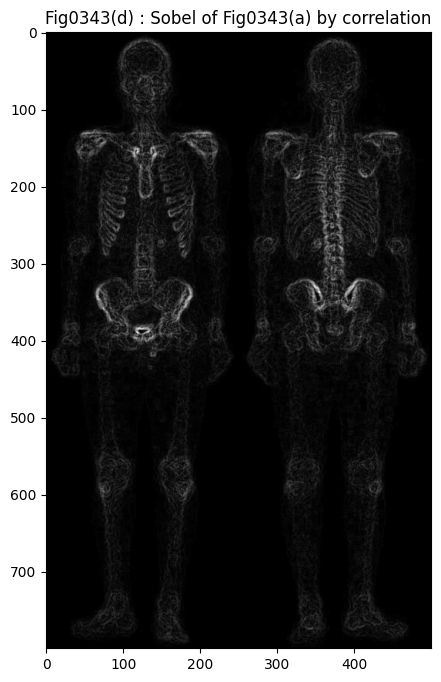

In [21]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(d) : Sobel of Fig0343(a) by correlation")
plt.imshow(fig_03_43_d_time_domain, cmap='gray' )
plt.show()

Fig0343(d) yi elde edebilmek için görüntüye ayrı ayrı x ve y yönünde sobel filtreleri uygulanmıştır sonra mutlak değerleri toplanmıştır.

In [23]:
sobel_x_kernel_size = sobel_x_kernel.shape
sobel_y_kernel_size = sobel_y_kernel.shape
sobel_x_kernel_fourier = Image_analyzer().my2Dfft(    image_array= sobel_x_kernel,
                                                            m_point=sobel_x_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                            n_point=sobel_x_kernel_size[1] + fig_03_43_a_size[1] - 1)
sobel_y_kernel_fourier = Image_analyzer().my2Dfft(    image_array= sobel_y_kernel,
                                                            m_point=sobel_y_kernel_size[0] + fig_03_43_a_size[0] - 1,
                                                            n_point=sobel_y_kernel_size[1] + fig_03_43_a_size[1] - 1)

print(sobel_x_kernel_size[0] + fig_03_43_a_size[0] - 1, sobel_x_kernel_size[1] + fig_03_43_a_size[1] - 1)


802 502


In [ ]:
fig_03_43_a_sobel_x_fourier_domain = fig_03_43_a_fourier * sobel_x_kernel_fourier
fig_03_43_a_sobel_y_fourier_domain = fig_03_43_a_fourier * sobel_y_kernel_fourier

fig_03_43_a_sobel_x_inverse_fourier = np.real(Image_analyzer().my2Difft(fig_03_43_a_sobel_x_fourier_domain))
fig_03_43_a_sobel_y_inverse_fourier = np.real(Image_analyzer().my2Difft(fig_03_43_a_sobel_y_fourier_domain))

fig_03_43_d_inverse_fourier = np.abs(fig_03_43_a_sobel_x_inverse_fourier) + np.abs(fig_03_43_a_sobel_y_inverse_fourier)

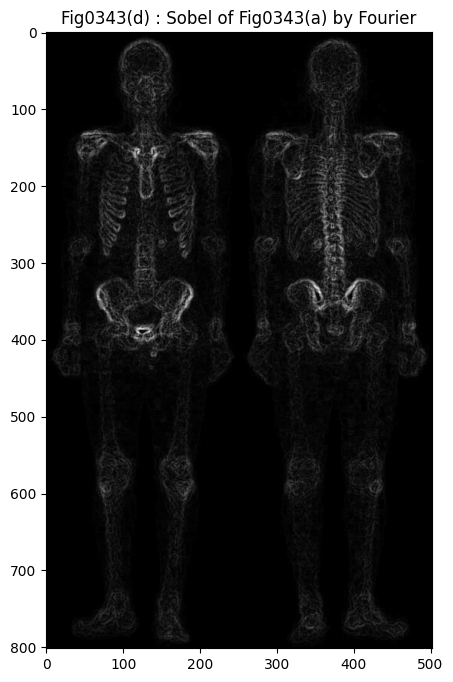

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(d) : Sobel of Fig0343(a) by Fourier")
plt.imshow(fig_03_43_d_inverse_fourier, cmap='gray')
plt.show()

sobel işlemi mutlak değerden dolayı tamamen frekans domaininde uygulanamamktadır bu yüzden sadece filtrlerin korelasyonla uygulamamak yerine frekans uzayında çarpılarak uygulanmıştır sonra ise ters fourier ile zaman uzayına dönüp |gx| ve |gy| toplanmıştır.

In [ ]:
average_kernel_5x5 = np.ones((5, 5)) / 25
fig_03_43_d_time_domain_analyzer = Image_analyzer()
fig_03_43_d_time_domain_analyzer.image_array = fig_03_43_d_time_domain
fig_03_43_d_time_domain_analyzer.set_image_height(fig_03_43_d_time_domain.shape[0])
fig_03_43_d_time_domain_analyzer.set_image_width(fig_03_43_d_time_domain.shape[1])
fig_03_43_e_time_domain = fig_03_43_d_time_domain_analyzer.myImageCorrelation(average_kernel_5x5)


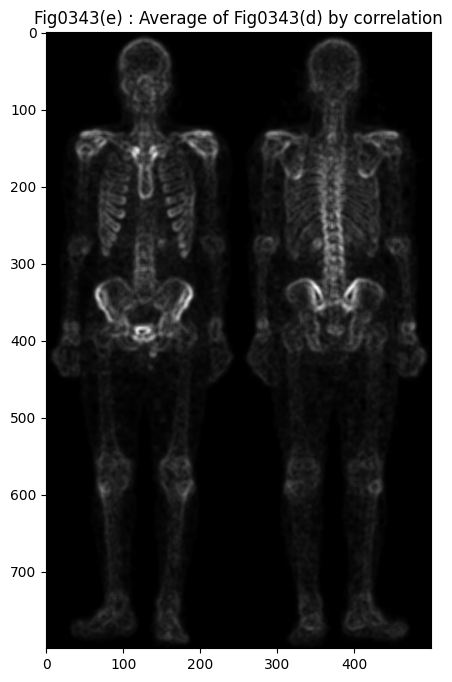

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(e) : Average of Fig0343(d) by correlation")
plt.imshow(fig_03_43_e_time_domain, cmap='gray')
plt.show()

Görüntüyü yumuşatmak için 5x5 ortalama (average) maskesi uygulanmıştır. Burda maske korelasyon işlemi ile aman uzayında uygulanmıştır ve ve Fig0343(e) görüntüsü elde edilmişitir.

In [ ]:

fig_03_43_c_fourier_domain_analyzer = Image_analyzer()
fig_03_43_c_fourier_domain_analyzer.image_array = fig_03_43_c_inverse_fourier
fig_03_43_c_fourier_domain_analyzer.set_image_height(fig_03_43_c_inverse_fourier.shape[0])
fig_03_43_c_fourier_domain_analyzer.set_image_width(fig_03_43_c_inverse_fourier.shape[1])
average_kernel_5x5_fourier = fig_03_43_c_fourier_domain_analyzer.my2Dfft(    image_array= average_kernel_5x5,
                                                            m_point=average_kernel_5x5.shape[0] + fig_03_43_c_inverse_fourier.shape[0] - 1,
                                                            n_point=average_kernel_5x5.shape[1] + fig_03_43_c_inverse_fourier.shape[1] - 1)
fig_03_43_c_fourier_domain_for_average = fig_03_43_c_fourier_domain_analyzer.my2Dfft(    image_array= fig_03_43_c_inverse_fourier,
                                                            m_point=average_kernel_5x5.shape[0] + fig_03_43_c_inverse_fourier.shape[0] - 1,
                                                            n_point=average_kernel_5x5.shape[1] + fig_03_43_c_inverse_fourier.shape[1] - 1)
fig_03_43_e_fourier_domain = fig_03_43_c_fourier_domain_for_average * average_kernel_5x5_fourier

fig_03_43_e_inverse_fourier_domain = Image_analyzer().my2Difft(fig_03_43_e_fourier_domain)

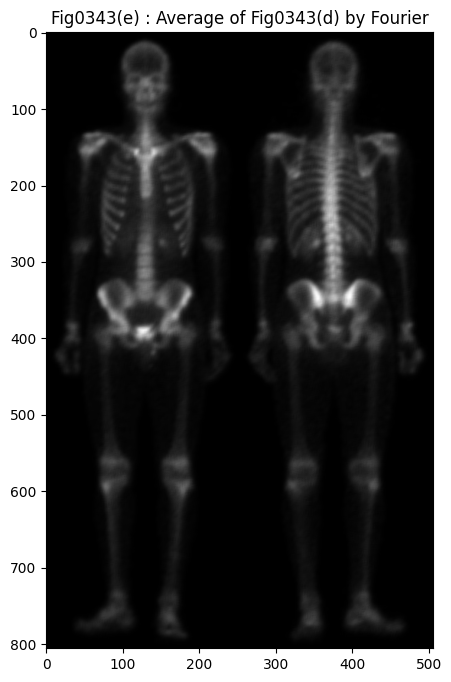

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(e) : Average of Fig0343(d) by Fourier")
plt.imshow(np.real(fig_03_43_e_inverse_fourier_domain), cmap='gray')
plt.show()

Average maskesinin fourier transformu alınıp fourier domaininde F.H işlemi yapılıp sonra tekrar inverse fourier yapıldığında çok iyi sonuç çıkmamaktadır. Zaman domaininde average masking yapmak daha iyi sonuç vermektedir.

In [ ]:
mask_image_from_c_multiply_e_time_domain = fig_03_43_c_time_domain * fig_03_43_e_time_domain

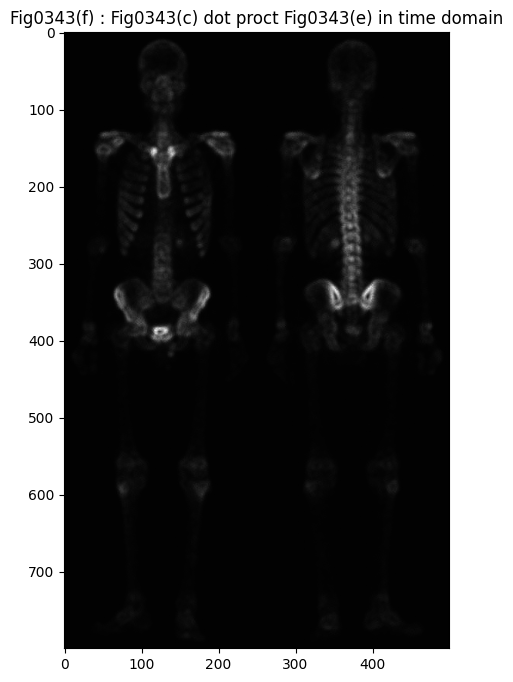

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(f) : Fig0343(c) dot proct Fig0343(e) in time domain")
plt.imshow(mask_image_from_c_multiply_e_time_domain, cmap='gray')
plt.show()

c ile e görüntüsü zaman domaininde çarpımı sonucu fig0343(f) görüntüsündeki görüntü oluşturulmuştur.

In [ ]:
# (g) Sharpened image obtained by the sum of (a) and (f).
mask = mask_image_from_c_multiply_e_time_domain > 0
fig_03_43_g_time_domain = np.array(Image_analyzer().image_array_scale(fig_03_43_a_analyzer.image_array) ) \
                    + np.array(Image_analyzer().image_array_scale(mask_image_from_c_multiply_e_time_domain * mask))

In [ ]:
#fig_03_43_g_time_domain = fig_03_43_a_analyzer.image_array + mask_image_from_c_multiply_e_time_domain

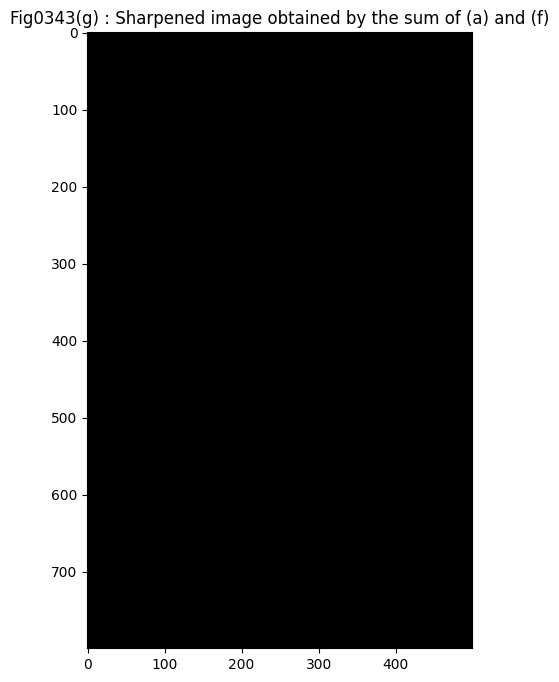

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(g) : Sharpened image obtained by the sum of (a) and (f)")
plt.imshow(Image_analyzer().image_array_scale(fig_03_43_g_time_domain), cmap='gray', vmin=0, vmax=255)
plt.show()

g şıkkında ise a ile f görüntüsün toplanması istenmektedir, böyle yapınca kitaba yakın bir sonuç bulamadım yukarda yorum satırına aldım. toplamadan önce her ikisini linear scale yapınca biraz daha kitaba benzedi ama bozulma oldu, bozulmayı gidermek için çeşitlei yollar denedim ama başaramadım denedikleim aşağıdaki gibidir:
1- keskinleştirme yaprken toplamak yerine a dan c çıkartmak
2- bazı aşamalarda linear scale işlemi yapmak
3- laplacian kernelini değiştirmek

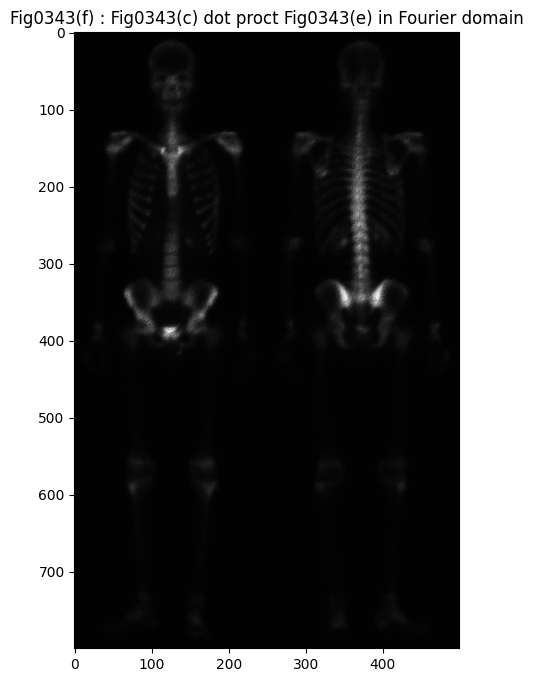

In [ ]:
mask_image_from_c_multiply_e_time_domain_from_fourier = (fig_03_43_e_inverse_fourier_domain[3:803, 3:503]) * fig_03_43_c_inverse_fourier[1:801, 1:501]
plt.figure(figsize=(8, 8))
plt.title("Fig0343(f) : Fig0343(c) dot proct Fig0343(e) in Fourier domain")
plt.imshow(np.real(mask_image_from_c_multiply_e_time_domain_from_fourier), cmap='gray')
plt.show()

fourier domaininden elde edilen görüntülerle de aynı maske elde edildi

In [ ]:
mask = mask_image_from_c_multiply_e_time_domain_from_fourier > 0
fig_03_43_g_time_domain_from_fourier = fig_03_43_a_analyzer.image_array  \
                    + Image_analyzer().image_array_scale(mask_image_from_c_multiply_e_time_domain_from_fourier * mask)
#fig_03_43_g_time_domain_from_fourier = mask_image_from_c_multiply_e_time_domain_from_fourier + fig_03_43_a_analyzer.image_array

C:\Users\yagmu\AppData\Local\Temp\ipykernel_7148\1740889884.py:144: ComplexWarning: Casting complex values to real discards the imaginary part
  image_array = np.array(image_array, dtype=np.uint8)


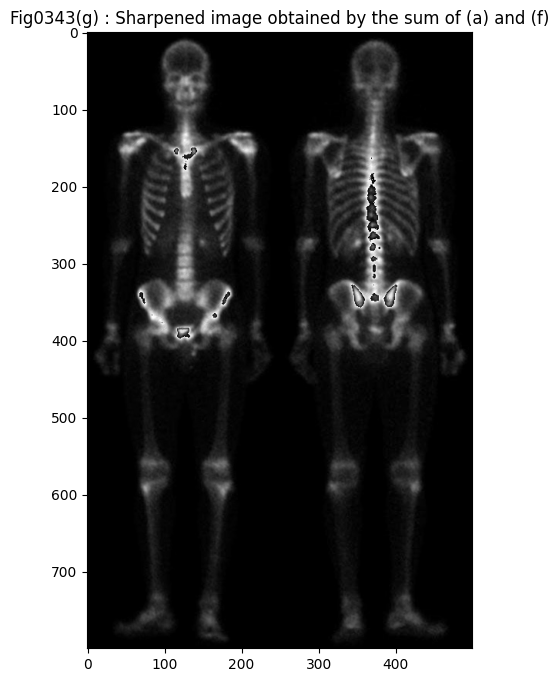

In [ ]:

plt.figure(figsize=(8, 8))
plt.title("Fig0343(g) : Sharpened image obtained by the sum of (a) and (f)")
plt.imshow(np.abs(fig_03_43_g_time_domain_from_fourier), cmap='gray')

yine g şıkkındaki görüntü elde edildi

In [ ]:
fig_03_43_g_time_domain_from_fourier_analyzer = Image_analyzer()
fig_03_43_g_time_domain_from_fourier_analyzer.image_array = fig_03_43_g_time_domain_from_fourier
fig_03_43_g_time_domain_from_fourier_analyzer.set_image_height(fig_03_43_g_time_domain_from_fourier.shape[0])
fig_03_43_g_time_domain_from_fourier_analyzer.set_image_width(fig_03_43_g_time_domain_from_fourier.shape[1])
fig_03_43_h_time_domain_from_fourier = fig_03_43_g_time_domain_from_fourier_analyzer.myImageGammaTransform(gamma = 0.5, c = 1)



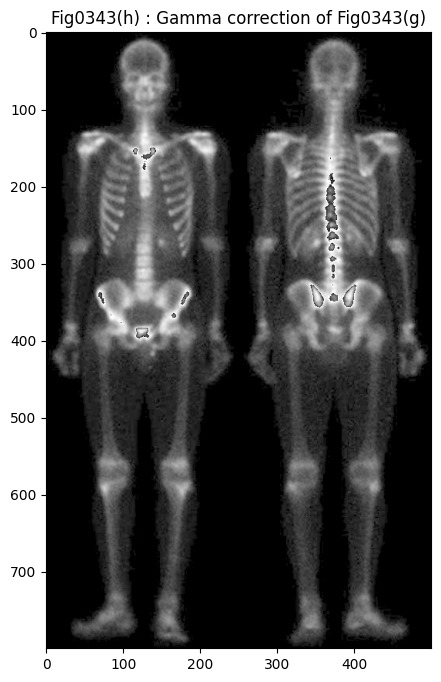

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Fig0343(h) : Gamma correction of Fig0343(g)")
plt.imshow(np.real(fig_03_43_h_time_domain_from_fourier), cmap='gray')
plt.show()


gama transformu kullanarak h taki görüntü elde edilmiştir. c = 1 ve gama = 0.5 seçilmiştir. 